## Import Libaries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Import the Datasets

In [2]:
application_data = pd.read_csv("C:\\Users\\hp\\OneDrive\\Desktop\\application_record.csv")
credit_data = pd.read_csv("C:\\Users\\hp\\OneDrive\\Desktop\\credit_record.csv")

In [3]:
application_data.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [4]:
credit_data.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [5]:
application_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

In [6]:
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


## Handling Missing Data 

In [7]:
application_data.isnull().sum()

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        134203
CNT_FAM_MEMBERS             0
dtype: int64

In [8]:
application_data['OCCUPATION_TYPE'] = application_data['OCCUPATION_TYPE'].fillna(application_data['OCCUPATION_TYPE'].mode()[0])

In [9]:
application_data.isnull().sum()

ID                     0
CODE_GENDER            0
FLAG_OWN_CAR           0
FLAG_OWN_REALTY        0
CNT_CHILDREN           0
AMT_INCOME_TOTAL       0
NAME_INCOME_TYPE       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
NAME_HOUSING_TYPE      0
DAYS_BIRTH             0
DAYS_EMPLOYED          0
FLAG_MOBIL             0
FLAG_WORK_PHONE        0
FLAG_PHONE             0
FLAG_EMAIL             0
OCCUPATION_TYPE        0
CNT_FAM_MEMBERS        0
dtype: int64

In [10]:
credit_data.isnull().sum()

ID                0
MONTHS_BALANCE    0
STATUS            0
dtype: int64

In [11]:
credit_card_data = pd.merge(application_data,credit_data,on='ID')

In [12]:
credit_card_data.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,Laborers,2.0,0,C
1,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,Laborers,2.0,-1,C
2,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,Laborers,2.0,-2,C
3,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,Laborers,2.0,-3,C
4,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,Laborers,2.0,-4,C


In [13]:
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 777715 entries, 0 to 777714
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   777715 non-null  int64  
 1   CODE_GENDER          777715 non-null  object 
 2   FLAG_OWN_CAR         777715 non-null  object 
 3   FLAG_OWN_REALTY      777715 non-null  object 
 4   CNT_CHILDREN         777715 non-null  int64  
 5   AMT_INCOME_TOTAL     777715 non-null  float64
 6   NAME_INCOME_TYPE     777715 non-null  object 
 7   NAME_EDUCATION_TYPE  777715 non-null  object 
 8   NAME_FAMILY_STATUS   777715 non-null  object 
 9   NAME_HOUSING_TYPE    777715 non-null  object 
 10  DAYS_BIRTH           777715 non-null  int64  
 11  DAYS_EMPLOYED        777715 non-null  int64  
 12  FLAG_MOBIL           777715 non-null  int64  
 13  FLAG_WORK_PHONE      777715 non-null  int64  
 14  FLAG_PHONE           777715 non-null  int64  
 15  FLAG_EMAIL       

In [14]:
credit_card_data.shape

(777715, 20)

In [15]:
credit_card_data['STATUS'].unique()

array(['C', '1', '0', 'X', '5', '4', '3', '2'], dtype=object)

In [16]:
credit_card_data['STATUS'] = credit_card_data['STATUS'].map({"C":0, "1":1, "0":0, "X":1, "5":0, "4":1, "3":0, "2":1})

In [17]:
credit_card_data['STATUS'].unique()

array([0, 1], dtype=int64)

In [18]:
credit_card_data['STATUS']

0         0
1         0
2         0
3         0
4         0
         ..
777710    0
777711    1
777712    1
777713    0
777714    0
Name: STATUS, Length: 777715, dtype: int64

In [19]:
credit_card_data.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,Laborers,2.0,0,0
1,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,Laborers,2.0,-1,0
2,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,Laborers,2.0,-2,0
3,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,Laborers,2.0,-3,0
4,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,Laborers,2.0,-4,0


## Encoding Categorial Data

In [20]:
from sklearn.preprocessing import LabelEncoder

In [21]:
label = LabelEncoder()
credit_card_data['CODE_GENDER'] = label.fit_transform(credit_card_data['CODE_GENDER'])
credit_card_data['FLAG_OWN_CAR'] = label.fit_transform(credit_card_data['FLAG_OWN_CAR'])
credit_card_data['FLAG_OWN_REALTY'] = label.fit_transform(credit_card_data['FLAG_OWN_REALTY'])
credit_card_data['NAME_INCOME_TYPE'] = label.fit_transform(credit_card_data['NAME_INCOME_TYPE'])
credit_card_data['NAME_EDUCATION_TYPE'] = label.fit_transform(credit_card_data['NAME_EDUCATION_TYPE'])
credit_card_data['NAME_FAMILY_STATUS'] = label.fit_transform(credit_card_data['NAME_FAMILY_STATUS'])
credit_card_data['NAME_HOUSING_TYPE'] = label.fit_transform(credit_card_data['NAME_HOUSING_TYPE'])
credit_card_data['OCCUPATION_TYPE'] = label.fit_transform(credit_card_data['OCCUPATION_TYPE'])

In [22]:
credit_card_data.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,5008804,1,1,1,0,427500.0,4,1,0,4,-12005,-4542,1,1,0,0,8,2.0,0,0
1,5008804,1,1,1,0,427500.0,4,1,0,4,-12005,-4542,1,1,0,0,8,2.0,-1,0
2,5008804,1,1,1,0,427500.0,4,1,0,4,-12005,-4542,1,1,0,0,8,2.0,-2,0
3,5008804,1,1,1,0,427500.0,4,1,0,4,-12005,-4542,1,1,0,0,8,2.0,-3,0
4,5008804,1,1,1,0,427500.0,4,1,0,4,-12005,-4542,1,1,0,0,8,2.0,-4,0


In [23]:
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 777715 entries, 0 to 777714
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   777715 non-null  int64  
 1   CODE_GENDER          777715 non-null  int32  
 2   FLAG_OWN_CAR         777715 non-null  int32  
 3   FLAG_OWN_REALTY      777715 non-null  int32  
 4   CNT_CHILDREN         777715 non-null  int64  
 5   AMT_INCOME_TOTAL     777715 non-null  float64
 6   NAME_INCOME_TYPE     777715 non-null  int32  
 7   NAME_EDUCATION_TYPE  777715 non-null  int32  
 8   NAME_FAMILY_STATUS   777715 non-null  int32  
 9   NAME_HOUSING_TYPE    777715 non-null  int32  
 10  DAYS_BIRTH           777715 non-null  int64  
 11  DAYS_EMPLOYED        777715 non-null  int64  
 12  FLAG_MOBIL           777715 non-null  int64  
 13  FLAG_WORK_PHONE      777715 non-null  int64  
 14  FLAG_PHONE           777715 non-null  int64  
 15  FLAG_EMAIL       

## Data Visualisation

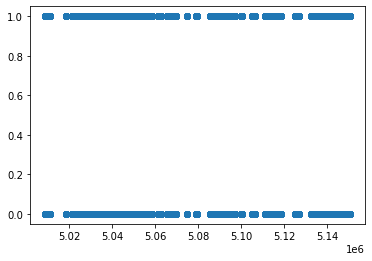

In [24]:
x = credit_card_data['ID']
y = credit_card_data['STATUS']
plt.scatter(x,y)
plt.show()

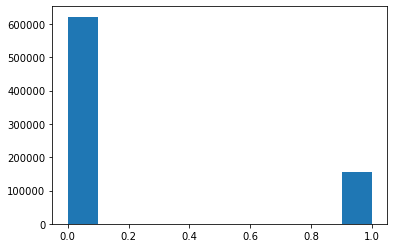

In [25]:
x = credit_card_data['STATUS']
plt.hist(x)
plt.show()

<AxesSubplot:xlabel='AMT_INCOME_TOTAL', ylabel='FLAG_OWN_CAR'>

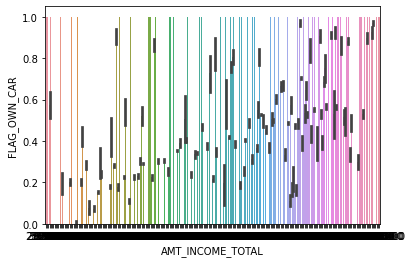

In [26]:
sns.barplot(x=credit_card_data['AMT_INCOME_TOTAL'],y=credit_card_data['FLAG_OWN_CAR'])

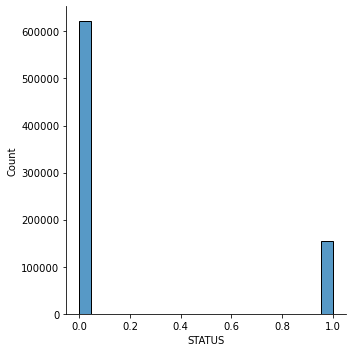

In [27]:
sns.displot(credit_card_data['STATUS'])

<AxesSubplot:xlabel='STATUS', ylabel='Density'>

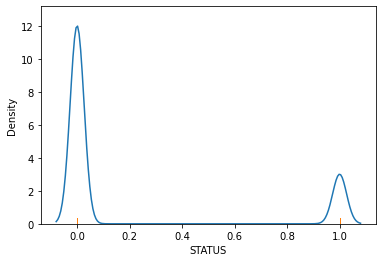

In [28]:
sns.kdeplot(credit_card_data['STATUS'])
sns.rugplot(credit_card_data['STATUS'])

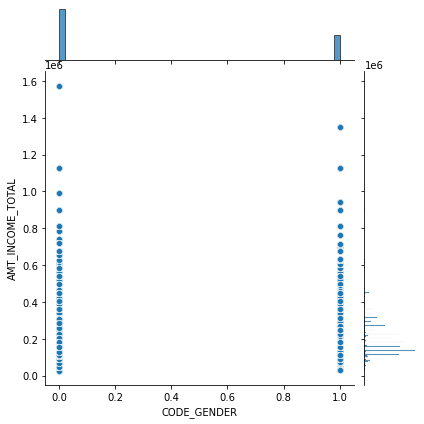

In [29]:
sns.jointplot(x=credit_card_data['CODE_GENDER'],y=credit_card_data['AMT_INCOME_TOTAL'],data=credit_card_data,kind='scatter')

<AxesSubplot:xlabel='ID', ylabel='Density'>

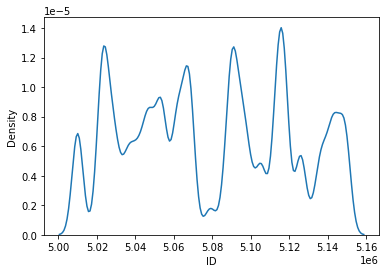

In [30]:
sns.kdeplot(credit_card_data['ID'])

<AxesSubplot:xlabel='STATUS', ylabel='count'>

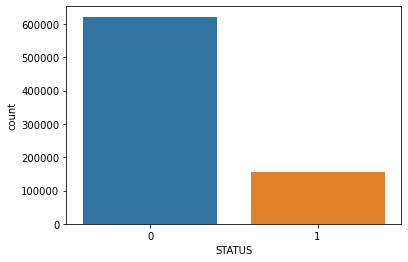

In [31]:
sns.countplot(x=credit_card_data['STATUS'],data=credit_card_data)

<AxesSubplot:>

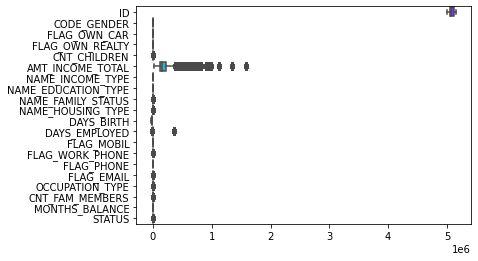

In [32]:
sns.boxplot(data=credit_card_data,palette='rainbow',orient='h')

<AxesSubplot:xlabel='CODE_GENDER', ylabel='FLAG_OWN_CAR'>

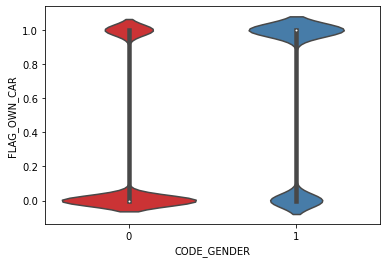

In [33]:
sns.violinplot(x=credit_card_data['CODE_GENDER'],y=credit_card_data['FLAG_OWN_CAR'],data=credit_card_data,palette='Set1')

<AxesSubplot:xlabel='CODE_GENDER', ylabel='OCCUPATION_TYPE'>

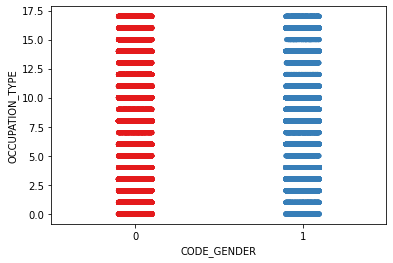

In [34]:
sns.stripplot(x=credit_card_data['CODE_GENDER'], y=credit_card_data['OCCUPATION_TYPE'], data=credit_card_data,jitter=True,palette='Set1')

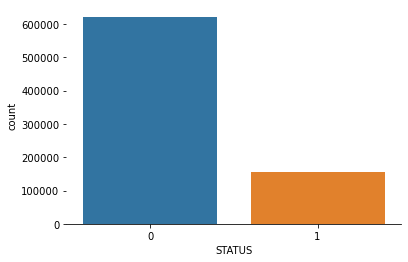

In [35]:
sns.countplot(x=credit_card_data['STATUS'],data=credit_card_data)
sns.despine(left=True)

<AxesSubplot:>

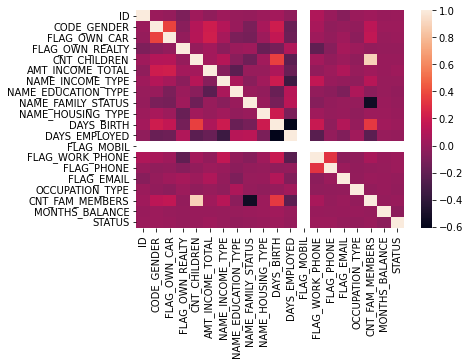

In [36]:
sns.heatmap(credit_card_data.corr())

## Model Selection

In [37]:
x = credit_card_data.iloc[:,:-1]

In [38]:
x

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE
0,5008804,1,1,1,0,427500.0,4,1,0,4,-12005,-4542,1,1,0,0,8,2.0,0
1,5008804,1,1,1,0,427500.0,4,1,0,4,-12005,-4542,1,1,0,0,8,2.0,-1
2,5008804,1,1,1,0,427500.0,4,1,0,4,-12005,-4542,1,1,0,0,8,2.0,-2
3,5008804,1,1,1,0,427500.0,4,1,0,4,-12005,-4542,1,1,0,0,8,2.0,-3
4,5008804,1,1,1,0,427500.0,4,1,0,4,-12005,-4542,1,1,0,0,8,2.0,-4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777710,5150337,1,0,1,0,112500.0,4,4,3,4,-9188,-1193,1,0,0,0,8,1.0,-9
777711,5150337,1,0,1,0,112500.0,4,4,3,4,-9188,-1193,1,0,0,0,8,1.0,-10
777712,5150337,1,0,1,0,112500.0,4,4,3,4,-9188,-1193,1,0,0,0,8,1.0,-11
777713,5150337,1,0,1,0,112500.0,4,4,3,4,-9188,-1193,1,0,0,0,8,1.0,-12


In [39]:
y = credit_card_data.iloc[:,-1]

In [40]:
y

0         0
1         0
2         0
3         0
4         0
         ..
777710    0
777711    1
777712    1
777713    0
777714    0
Name: STATUS, Length: 777715, dtype: int64

## Split Train and Test

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.2,random_state=0)

In [43]:
len(x_train)

155543

In [44]:
len(x_test)

622172

## Logistic Regression

In [45]:
from sklearn.linear_model import LogisticRegression

In [46]:
log = LogisticRegression()

In [47]:
log.fit(x_train,y_train)

LogisticRegression()

In [48]:
log_score = log.score(x_test,y_test)*100
log_score

79.98109847437685

## K-Nearest Neighbor Algorithm

In [49]:
from sklearn.neighbors import KNeighborsClassifier

In [50]:
knn = KNeighborsClassifier(n_neighbors=1)

In [51]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [52]:
knn_score = knn.score(x_test,y_test)*100
knn_score = int(knn_score)
knn_score

84

## Comparison Logistic vs KNN Algorithm

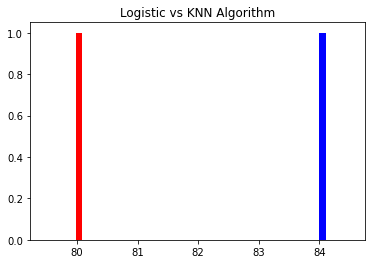

In [53]:
log = log_score
knn = knn_score
plt.hist(log,color='red')
plt.hist(knn,color='blue')
plt.title('Logistic vs KNN Algorithm')
plt.show()

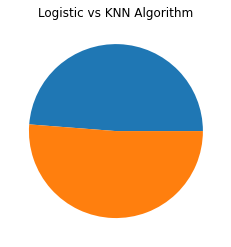

In [54]:
data = log_score,knn_score
plt.pie(data)
plt.title('Logistic vs KNN Algorithm')
plt.show()

## Decision Tree Algorithm

In [55]:
from sklearn.tree import DecisionTreeClassifier

In [56]:
tree = DecisionTreeClassifier()

In [57]:
tree.fit(x_train,y_train)

DecisionTreeClassifier()

In [58]:
tree_score = tree.score(x_test,y_test)*100
tree_score

87.42662800640338

## Random Forest Algorithm

In [59]:
from sklearn.ensemble import RandomForestClassifier

In [60]:
random = RandomForestClassifier()

In [61]:
random.fit(x_train,y_train)

RandomForestClassifier()

In [62]:
random_score = random.score(x_test,y_test)*100
random_score

89.4733289186913

## Comparison Decision Tree vs Random Forest Algorithm 

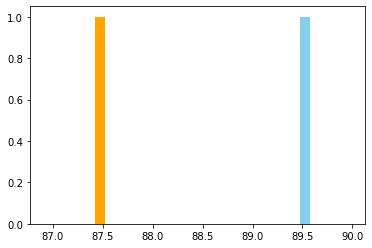

In [63]:
tree = tree_score
random = random_score
plt.hist(tree_score,color='orange')
plt.hist(random,color='skyblue')
plt.show()

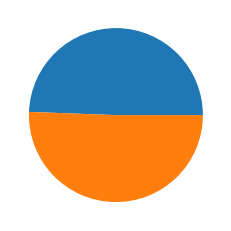

In [64]:
data = tree_score,random_score
plt.pie(data)
plt.show()

## Support Vector Machine 

In [65]:
from sklearn.svm import LinearSVC

In [66]:
svms = LinearSVC()

In [67]:
svms.fit(x_train,y_train)

LinearSVC()

In [68]:
svms_score = svms.score(x_test,y_test)*100
svms_score

79.98109847437685

## Naive Bayes

In [69]:
from sklearn.naive_bayes import GaussianNB

In [70]:
naive = GaussianNB()

In [71]:
naive.fit(x_train,y_train)

GaussianNB()

In [72]:
naive_score = naive.score(x_test,y_test)*100
naive_score

79.98109847437685

## Comparison Logistic vs KNN vs Decision Tree vs Random Forest Algorithm 

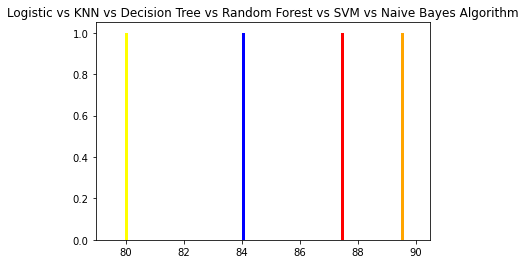

In [73]:
log_model = log_score
knn_model = knn_score
tree_model = tree_score
random_model = random_score
svm_model = svms_score
naive_model = naive_score
plt.hist(svm_model,color='Green')
plt.hist(naive_model,color='violet')
plt.hist(log_model,color='Yellow')
plt.hist(knn_model,color='Blue')
plt.hist(tree_model,color='Red')
plt.hist(random_model,color='Orange')
plt.title('Logistic vs KNN vs Decision Tree vs Random Forest vs SVM vs Naive Bayes Algorithm')
plt.show()

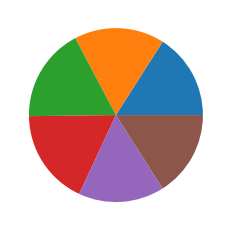

In [74]:
model_data = log_score, knn_score, tree_score, random_score, svms_score, naive_score
plt.pie(model_data)
plt.show()

## Roc Curve and AUC 

In [80]:
from sklearn.metrics import roc_curve,roc_auc_score

In [81]:
roc_probs = [0 for _ in range(len(y_test))]
log_probs = log.predict_proba(x_test)
tree_probs = tree.predict_proba(x_test)
random_probs = random.predict_proba(x_test)

AttributeError: 'numpy.float64' object has no attribute 'predict_proba'

In [82]:
log_probs = log_probs[:, 1]
tree_probs = tree_probs[:, 1]
random_probs = random_probs[:, 1]

NameError: name 'log_probs' is not defined

In [83]:
roc_auc = roc_auc_score(y_test, roc_probs)
log_auc = roc_auc_score(y_test, log_probs)
tree_auc = roc_auc_score(y_test, tree_probs)
random_auc = roc_auc_score(y_test, random_probs)

NameError: name 'log_probs' is not defined

In [84]:
roc_fpr, roc_tpr, _ = roc_curve(y_test, roc_probs)
log_fpr, log_tpr, _ = roc_curve(y_test, log_probs)
tree_fpr, tree_tpr, _ = roc_curve(y_test, tree_probs)
random_fpr, random_tpr, _ = roc_curve(y_test, random_probs)

NameError: name 'log_probs' is not defined

NameError: name 'log_fpr' is not defined

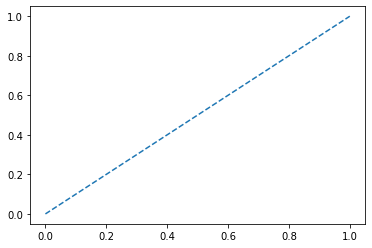

In [85]:
plt.plot(roc_fpr, roc_tpr, linestyle='--', label='Roc prediction (AUROC = %0.3f)' % roc_auc)
plt.plot(log_fpr, log_tpr, marker='.', label='Logistic (AUROC = %0.3f)' % log_auc)
plt.plot(tree_fpr, tree_tpr, marker='.', label='Decision Tree (AUROC = %0.3f)' % tree_auc)
plt.plot(random_fpr, random_tpr, marker='.', label='Random Forest (AUROC = %0.3f)' % random_auc)
# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()

## Confusion Matrix

In [86]:
from sklearn.metrics import confusion_matrix

In [87]:
log_pred = log.predict(x_test)
log_conf = confusion_matrix(y_test,pred)
log_conf

AttributeError: 'numpy.float64' object has no attribute 'predict'

In [88]:
tree_pred = tree.predict(x_test)
tree_pred = confusion_matrix(y_test,tree_pred)
tree_pred

AttributeError: 'numpy.float64' object has no attribute 'predict'

In [143]:
random_pred = random.predict(x_test)
random_pred = confusion_matrix(y_test,random_pred)
random_pred

array([[474435,  23185],
       [ 42117,  82435]], dtype=int64)

<AxesSubplot:title={'center':'Random Forest'}>

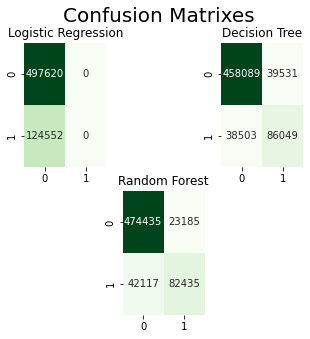

In [150]:
plt.figure(figsize=(5,5))

plt.suptitle("Confusion Matrixes",fontsize=20)

plt.subplot(2,3,1)
plt.title("Logistic Regression")
sns.heatmap(log_conf,cbar=False,annot=True,cmap="Greens",fmt="d")

plt.subplot(2,3,3)
plt.title("Decision Tree")
sns.heatmap(tree_pred,cbar=False,annot=True,cmap="Greens",fmt="d")

plt.subplot(2,3,5)
plt.title("Random Forest")
sns.heatmap(random_pred,cbar=False,annot=True,cmap="Greens",fmt="d")